# How Have NBA Statistics Changed Overtime?

# Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# pip install matplotlib
# pip install seaborn

# run this cell if the above import statement gives you an error about modules not being found

In [4]:
regular_df = pd.read_csv('regular.csv')
regular_df.set_index('Season', inplace=True)
regular_df

,Rk,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
Season,,,,,,,,,,,,,,,,,,,,,
2025-26,1,NBA,26.4,6-7,216.0,213,242.0,41.8,89.2,13.4,...,0.468,0.358,0.791,100.5,0.543,13.2,26.4,0.227,115.6,0.583
2024-25,2,NBA,26.3,6-7,215.0,1230,241.3,41.7,89.2,13.5,...,0.467,0.360,0.780,98.8,0.543,12.6,25.2,0.189,114.5,0.576
2023-24,3,NBA,26.4,6-7,216.0,1230,241.4,42.2,88.9,12.8,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
2022-23,4,NBA,26.1,6-6,216.0,1230,241.8,42.0,88.3,12.3,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
2021-22,5,NBA,26.1,6-6,215.0,1230,241.4,40.6,88.1,12.4,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,76,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,NaN,...,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN,0.428
1949-50,77,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,NaN,...,0.340,NaN,0.712,NaN,0.340,NaN,NaN,0.284,NaN,0.410
1948-49,78,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,NaN,...,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN,0.390


In [5]:
playoffs_df = pd.read_csv('playoffs.csv')
playoffs_df.set_index('Season', inplace=True)
playoffs_df

,Rk,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
Season,,,,,,,,,,,,,,,,,,,,,
2024-25,1,NBA,26.3,6-7,215.0,84,241.5,38.9,85.6,12.4,...,0.455,0.354,0.775,95.6,0.528,12.8,25.9,0.215,113.0,0.566
2023-24,2,NBA,26.4,6-7,216.0,82,240.9,39.0,84.4,11.7,...,0.462,0.351,0.779,92.7,0.532,11.6,24.1,0.188,113.5,0.566
2022-23,3,NBA,26.1,6-6,216.0,84,241.2,40.2,87.2,12.0,...,0.461,0.351,0.794,96.1,0.530,11.7,24.0,0.197,113.5,0.566
2021-22,4,NBA,26.1,6-6,215.0,87,240.3,38.2,83.7,12.3,...,0.456,0.355,0.785,95.5,0.529,12.8,22.3,0.212,111.2,0.567
2020-21,5,NBA,26.1,6-6,217.0,85,241.2,40.2,86.9,12.5,...,0.462,0.364,0.786,96.1,0.534,11.2,22.8,0.201,114.3,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,75,NBA,NaN,NaN,NaN,26,NaN,29.5,78.4,NaN,...,0.376,NaN,0.723,NaN,0.376,NaN,NaN,0.308,NaN,0.446
1949-50,76,NBA,NaN,NaN,NaN,30,NaN,26.9,78.3,NaN,...,0.344,NaN,0.732,NaN,0.344,NaN,NaN,0.343,NaN,0.427
1948-49,77,BAA,NaN,NaN,NaN,20,NaN,26.8,81.5,NaN,...,0.329,NaN,0.717,NaN,0.329,NaN,NaN,0.306,NaN,0.405


# Exploratory Data Analysis (EDA)

In [6]:
regular_df.columns

Index(['Rk', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'ORtg', 'TS%'],
      dtype='object')

### Columns we care about - purely scoring related statistics

- field goals per game (FG)
- field goal attempts per game (FGA)
- 3 pointers per game (3P)
- 3 point attempts per game (3PA)
- free throws per game (FT)
- free throw attempts per game (FTA)


- field goal percentage (FG%)
- 3 point percentage (3P%)
- free throw percentage (FT%)
- effective field goal percentage (eFG%)
- true shooting percentage (TS%)
- points (pts)



In [7]:
desired_columns = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'FG', 'eFG%', 'PTS']

In [8]:
filtered_regular = regular_df[desired_columns].copy()
filtered_regular[['FG%', '3P%', 'FT%', 'eFG%']] *= 100
filtered_regular

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS
Season,,,,,,,,,,,,
2025-26,41.8,89.2,46.8,13.4,37.3,35.8,20.2,25.5,79.1,41.8,54.3,117.1
2024-25,41.7,89.2,46.7,13.5,37.6,36.0,16.9,21.7,78.0,41.7,54.3,113.8
2023-24,42.2,88.9,47.4,12.8,35.1,36.6,17.0,21.7,78.4,42.2,54.7,114.2
2022-23,42.0,88.3,47.5,12.3,34.2,36.1,18.4,23.5,78.2,42.0,54.5,114.7
2021-22,40.6,88.1,46.1,12.4,35.2,35.4,16.9,21.9,77.5,40.6,53.2,110.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,29.8,83.6,35.7,NaN,NaN,NaN,24.5,33.4,73.3,29.8,35.7,84.1
1949-50,28.2,83.1,34.0,NaN,NaN,NaN,23.6,33.1,71.2,28.2,34.0,80.0
1948-49,29.0,88.7,32.7,NaN,NaN,NaN,22.0,31.3,70.3,29.0,32.7,80.0


In [9]:
filtered_playoffs = playoffs_df[desired_columns].copy()
filtered_playoffs[['FG%', '3P%', 'FT%', 'eFG%']] *= 100
filtered_playoffs

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS
Season,,,,,,,,,,,,
2024-25,38.9,85.6,45.5,12.4,35.2,35.4,18.4,23.8,77.5,38.9,52.8,108.8
2023-24,39.0,84.4,46.2,11.7,33.4,35.1,15.9,20.3,77.9,39.0,53.2,105.6
2022-23,40.2,87.2,46.1,12.0,34.3,35.1,17.2,21.6,79.4,40.2,53.0,109.6
2021-22,38.2,83.7,45.6,12.3,34.6,35.5,17.7,22.6,78.5,38.2,52.9,106.3
2020-21,40.2,86.9,46.2,12.5,34.3,36.4,17.5,22.2,78.6,40.2,53.4,110.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,29.5,78.4,37.6,NaN,NaN,NaN,24.2,33.5,72.3,29.5,37.6,83.1
1949-50,26.9,78.3,34.4,NaN,NaN,NaN,26.8,36.7,73.2,26.9,34.4,80.6
1948-49,26.8,81.5,32.9,NaN,NaN,NaN,25.0,34.8,71.7,26.8,32.9,78.5


### Checking if any columns have Null values

In [10]:
filtered_regular.isnull().sum()

FG       0
FGA      0
FG%      0
3P      33
3PA     33
3P%     33
FT       0
FTA      0
FT%      0
FG       0
eFG%     0
PTS      0
dtype: int64

In [11]:
filtered_regular.isnull().sum()

FG       0
FGA      0
FG%      0
3P      33
3PA     33
3P%     33
FT       0
FTA      0
FT%      0
FG       0
eFG%     0
PTS      0
dtype: int64

In [12]:
two_seasons = filtered_regular.loc[["1979-80", "1978-79"]]
two_seasons

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS
Season,,,,,,,,,,,,
1979-80,43.6,90.6,48.1,0.8,2.8,28.0,21.3,27.8,76.4,43.6,48.6,109.3
1978-79,44.5,91.7,48.5,NaN,NaN,NaN,21.3,28.3,75.2,44.5,48.5,110.3


These Null values in the three point column make sense because the three point line was added in the 1979-80 season, so no data would exist before this

To fix this, we will replace the null values with 0 so that they make more context in this situation

In [13]:
filtered_regular.fillna(0, inplace=True)
filtered_regular.fillna(0, inplace=True)

### Comparing Averages

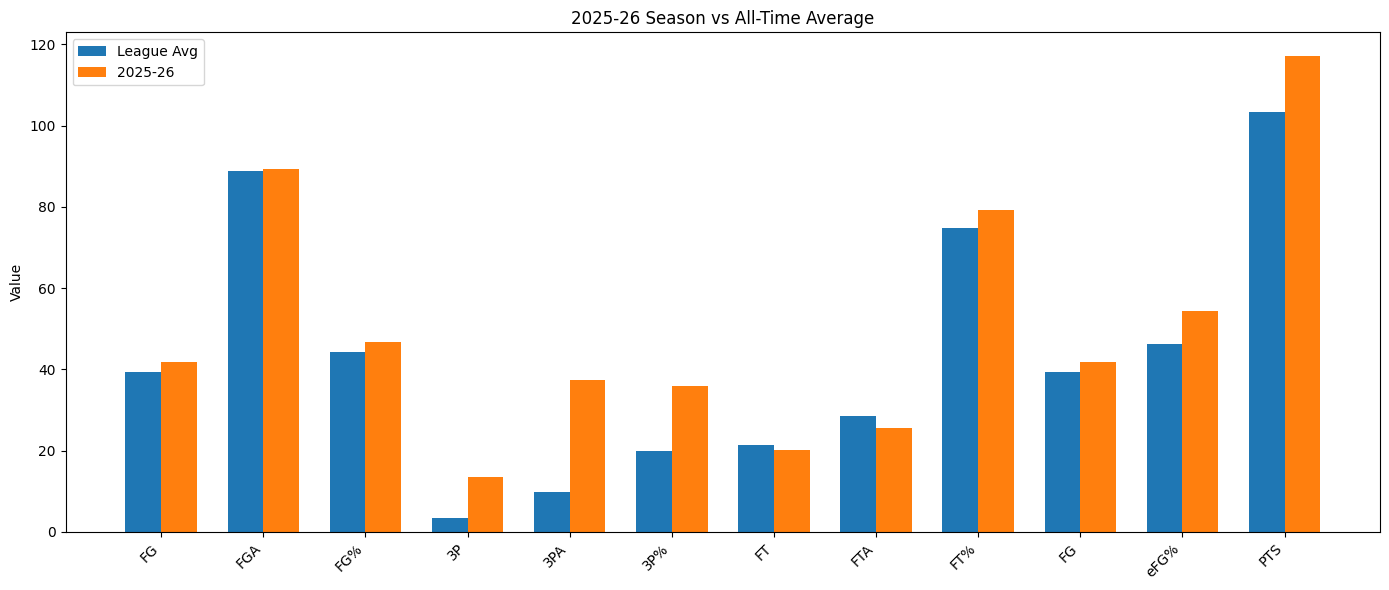

In [15]:
league_avg = filtered_regular.mean()

current = filtered_regular.loc["2025-26"]

compare = pd.DataFrame({
    "League Avg": league_avg,
    "2025-26": current
})

x = np.arange(len(compare.index))
width = 0.35   # width of each bar

plt.figure(figsize=(14, 6))

plt.bar(x - width/2, compare["League Avg"], width, label="League Avg")
plt.bar(x + width/2, compare["2025-26"], width, label="2025-26")

plt.xticks(x, compare.index, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("2025-26 Season vs All-Time Average")
plt.legend()

plt.tight_layout()
plt.show()

It seems that the biggest changes in difference are the number of 3 pointers attempted and the average points scored by a team

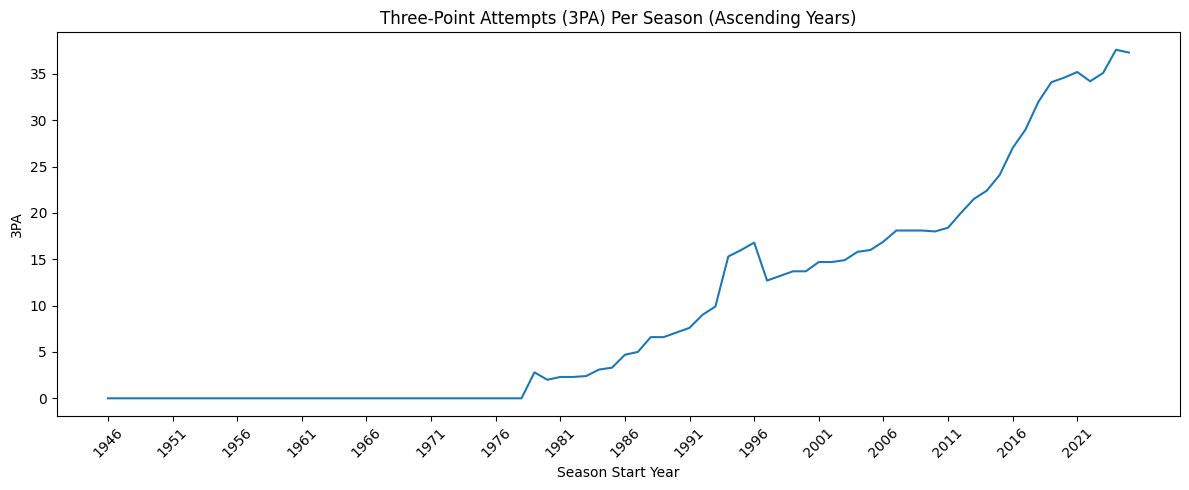

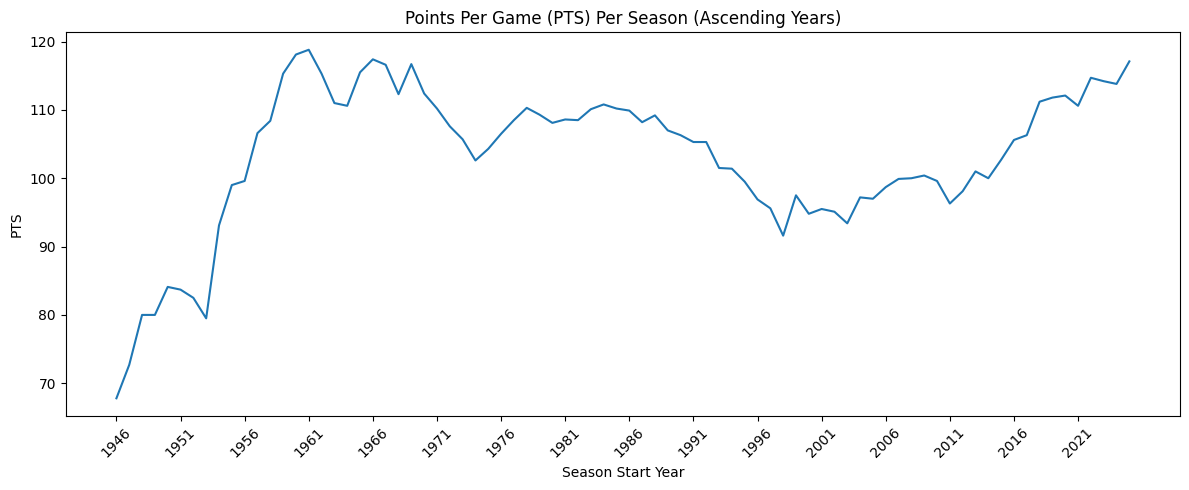

In [52]:
filtered_regular_sorted = filtered_regular.copy()

# Get the first 4 characters and convert to int
filtered_regular_sorted["Year"] = filtered_regular_sorted.index.str[:4].astype(int)

# Sort by Year ascending
filtered_regular_sorted = filtered_regular_sorted.sort_values("Year")

# Line chart for 3PA
plt.figure(figsize=(12, 5))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["3PA"])
plt.title("Three-Point Attempts (3PA) Per Season (Ascending Years)")
plt.xlabel("Season Start Year")
plt.ylabel("3PA")
plt.xticks(filtered_regular_sorted["Year"][::5], rotation=45)
plt.tight_layout()
plt.show()

# Line chart for PTS 
plt.figure(figsize=(12, 5))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["PTS"])
plt.title("Points Per Game (PTS) Per Season (Ascending Years)")
plt.xlabel("Season Start Year")
plt.ylabel("PTS")
plt.xticks(filtered_regular_sorted["Year"][::5], rotation=45)
plt.tight_layout()
plt.show()

In [54]:
standardized = filtered_regular.copy

standardized = (filtered_regular - filtered_regular.mean()) / filtered_regular.std()

standardized = standardized.fillna(0)

standardized["Year"] = standardized.index.str[:4].astype(int)

standardized = standardized.sort_values("Year", ascending=True)

standardized

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS,Year
Season,,,,,,,,,,,,,
1946-47,-2.724411,0.504543,-3.697974,-0.824008,-0.841670,-1.170960,-1.569652,-0.759524,-4.549960,-2.724411,-3.205482,-3.295252,1946
1947-48,-2.459112,0.896913,-3.584452,-0.824008,-0.841670,-1.170960,-0.900012,-0.315270,-3.095855,-2.459112,-3.118074,-2.839869,1947
1948-49,-2.091776,-0.027055,-2.608164,-0.824008,-0.841670,-1.170960,0.206351,0.553047,-1.898356,-2.091776,-2.366362,-2.161442,1948
1949-50,-2.255037,-0.735852,-2.313007,-0.824008,-0.841670,-1.170960,0.672188,0.916528,-1.513446,-2.255037,-2.139101,-2.161442,1949
1950-51,-1.928516,-0.672566,-1.927033,-0.824008,-0.841670,-1.170960,0.934222,0.977108,-0.615322,-1.928516,-1.841912,-1.780407,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-22,0.275502,-0.102997,0.434221,2.131220,2.181856,0.922178,-1.278504,-1.345133,1.180926,0.275502,1.217380,0.682377,2021
2022-23,0.561208,-0.077683,0.752082,2.107388,2.095960,0.963568,-0.841782,-1.022039,1.480301,0.561208,1.444641,1.063412,2022
2023-24,0.602023,-0.001740,0.729378,2.226550,2.173266,0.993132,-1.249389,-1.385520,1.565836,0.602023,1.479605,1.016944,2023


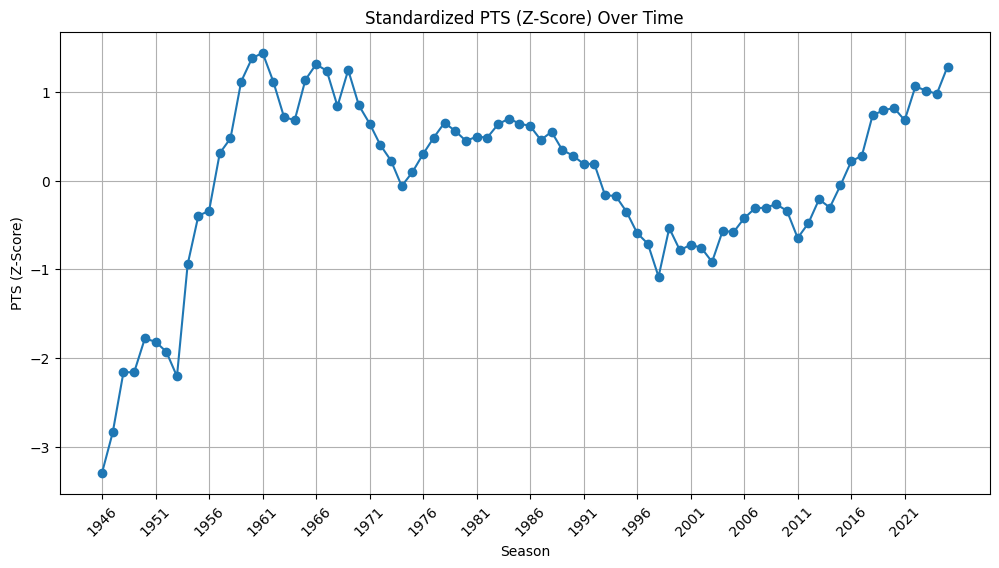

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(standardized.index, standardized["PTS"], marker="o")
plt.title("Standardized Points (Z-Score) Over Time")
plt.xlabel("Season")
plt.ylabel("PTS (Z-Score)")
clean_labels = standardized.index.str[:4]  # extract the year
plt.xticks(standardized.index[::5], clean_labels[::5], rotation=45)
plt.grid(True)
plt.show()

By standardizing the data, we can see clear trends in the evolution of scoring across NBA history. The early years of the league were characterized by extremely low scoring, which is expected given the slower pace and lack of a shot clock. Interestingly, the standardized plot shows that the offensive explosion of the 1950s and especially the early 1960s was just as historically extreme as the high-scoring environment of the modern NBA. While raw points per game today are very high, they are not unprecedented. Similar scoring levels occurred during the 1960s, just driven by different underlying factors such as pace instead of three-point shooting. This explains why the standardized and raw PTS graphs share a similar shape, even though the reasons behind the spikes differ across eras.

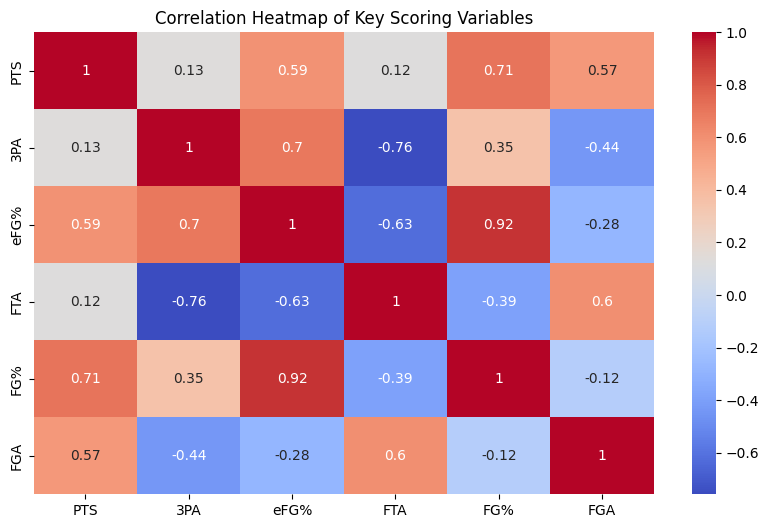

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(filtered_regular_sorted[["PTS","3PA","eFG%","FTA","FG%","FGA"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Scoring Variables")
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression

X = filtered_regular_sorted[["3PA","eFG%","FTA","FGA"]]
y = filtered_regular_sorted["PTS"]

model = LinearRegression()
model.fit(X,y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X,y))

Coefficients: [-0.01516238  1.90413357  0.80527481  0.84819506]
Intercept: -83.04978240156093
R-squared: 0.9953234356134163


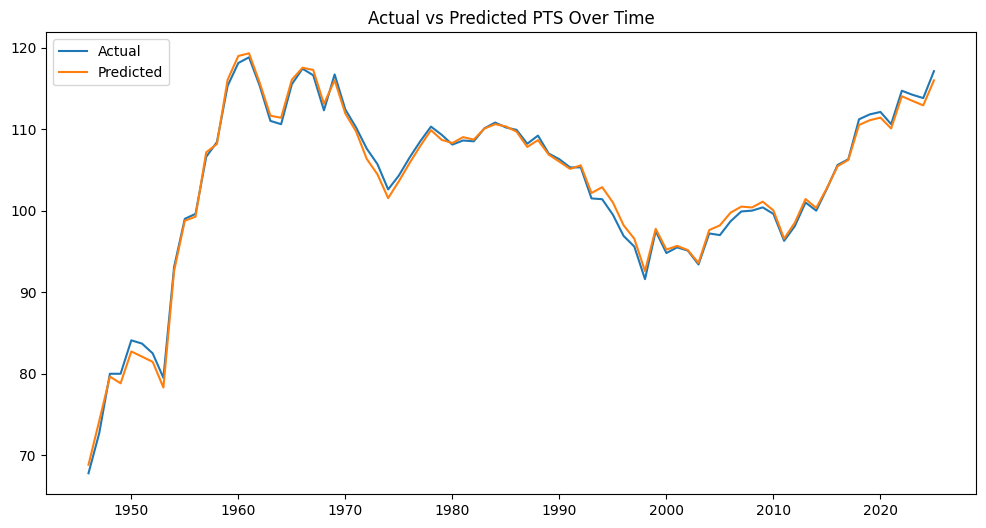

In [63]:
filtered_regular_sorted["PTS_pred"] = model.predict(X)

plt.figure(figsize=(12,6))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["PTS"], label="Actual")
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["PTS_pred"], label="Predicted")
plt.title("Actual vs Predicted PTS Over Time")
plt.legend()
plt.show()